<a href="https://colab.research.google.com/github/kamyarmig/Costumer-Service-Center-Call-Prediction/blob/master/Stock_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In this page is to be able to Analys the stock and have a good visual inspection at it**

Calling the proper libraries and
Calling the Source file for colab

In [1]:
!pip install mpl_finance

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
file = "/content/gdrive/My Drive/Colab Notebooks/AAL.csv"

df = pd.read_csv(file,encoding='ISO-8859-1')
#df['Date'] = df['Date'].astype(float)
df.info()
print(df.shape)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     755 non-null    object 
 1   Open     755 non-null    float64
 2   High     755 non-null    float64
 3   Low      755 non-null    float64
 4   Close    755 non-null    float64
 5   Vol      755 non-null    int64  
 6   OI       755 non-null    int64  
 7   FastEMA  755 non-null    float64
 8   VWAP     755 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 53.2+ KB
(755, 9)


,Date,Open,High,Low,Close,Vol,OI,FastEMA,VWAP
0,6/26/2017,48.81,49.78,48.54,48.78,3992866,0,0.00,0.00
1,6/27/2017,48.60,49.56,48.50,48.50,4264403,0,48.50,48.85
2,6/28/2017,48.82,49.80,48.81,49.25,4259721,0,48.65,49.29
3,6/29/2017,49.28,49.69,48.82,49.62,6170117,0,48.84,49.38
4,6/30/2017,49.92,50.51,49.60,50.32,6618701,0,49.14,50.14


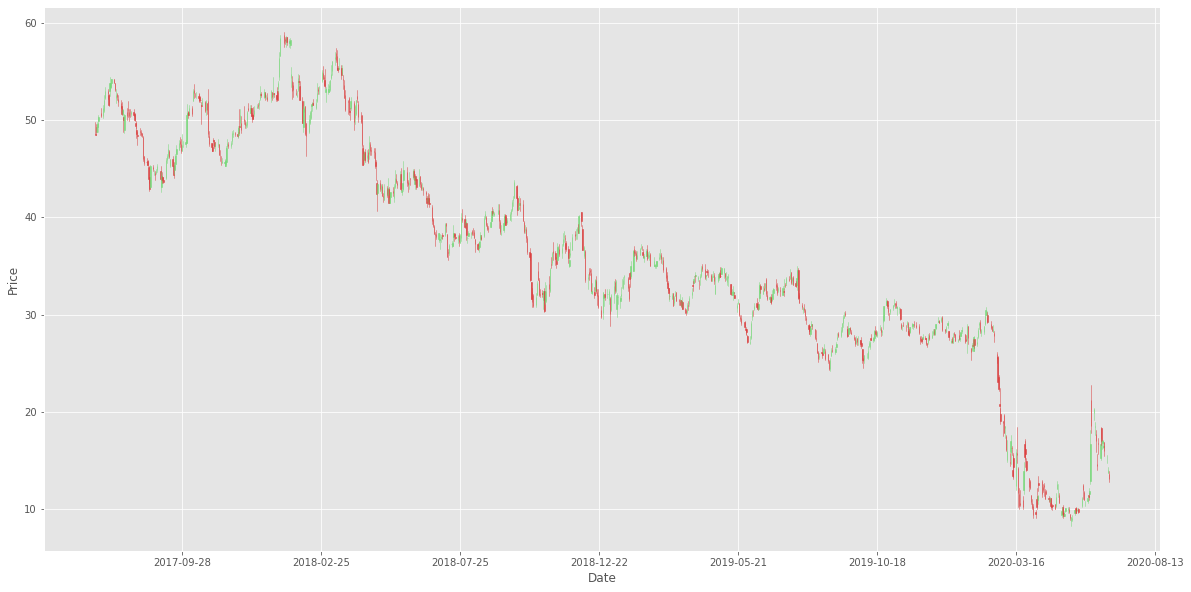

In [5]:
import matplotlib.ticker as mticker
import mpl_finance
from mpl_finance import candlestick_ohlc
#from matplotlib.finance import candlestick_ohlc
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df_cp = df.copy()
df_cp.Date = date2num(pd.to_datetime(df.Date).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=2)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

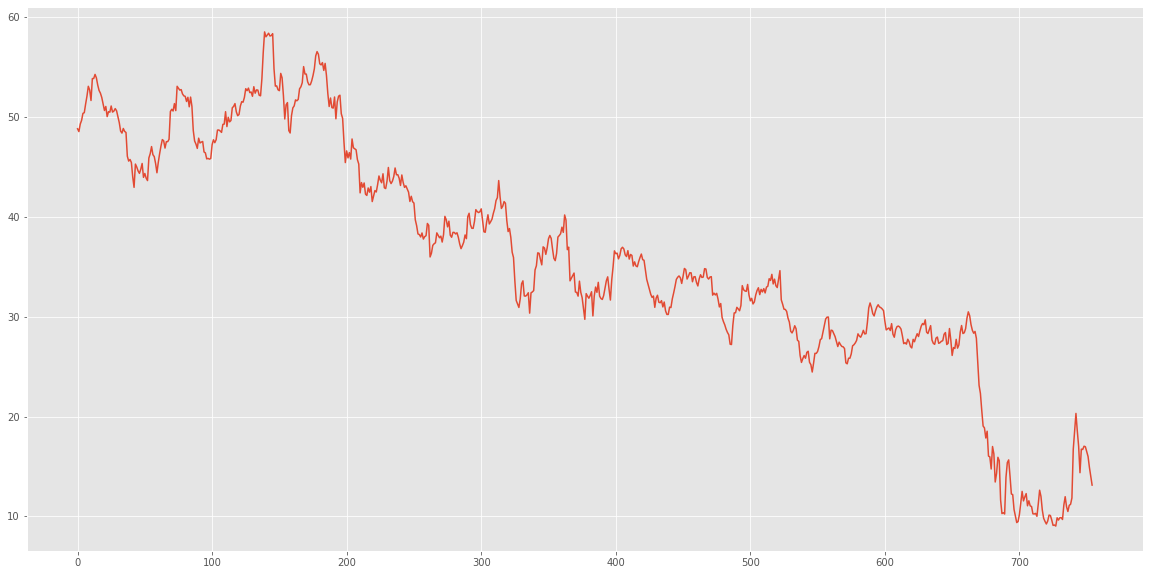

In [6]:
df.Close.plot()

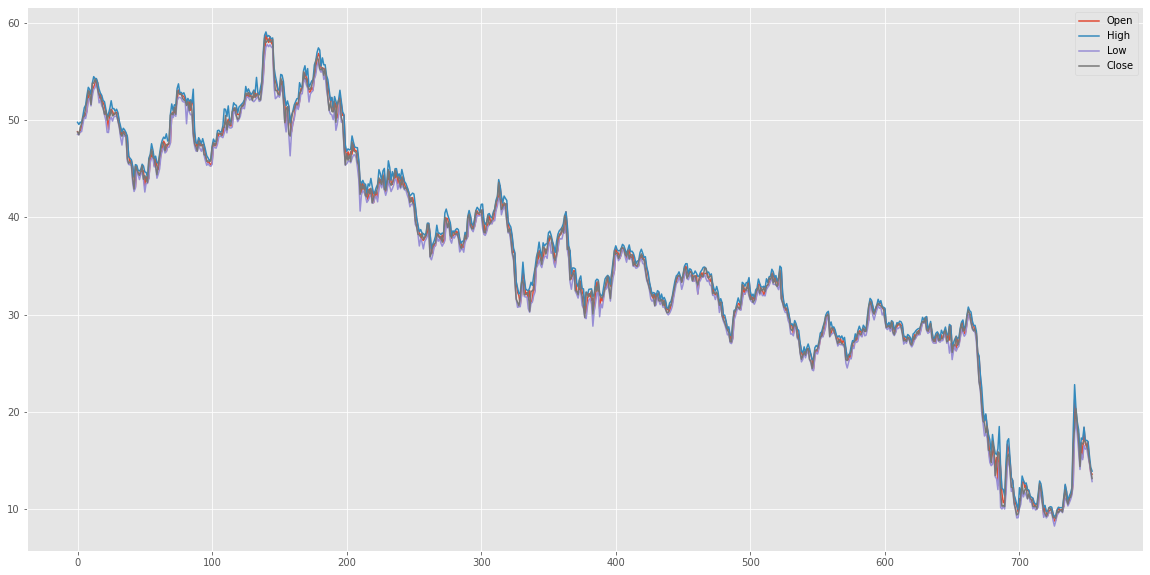

In [7]:
df.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])

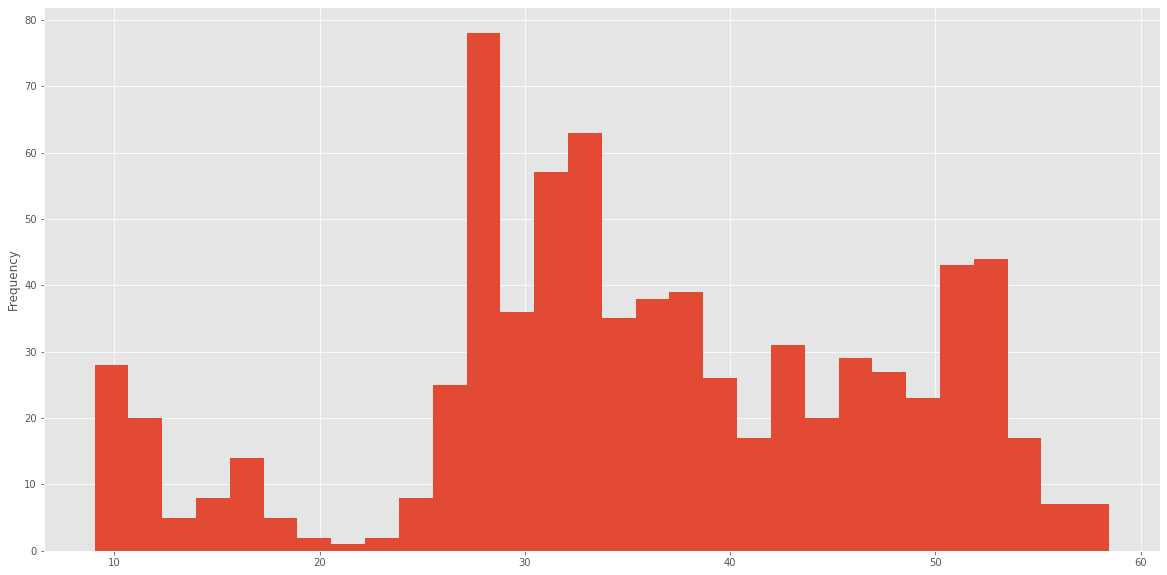

In [8]:
df.Close.plot(kind = "hist", bins = 30)

In [9]:
from sklearn import linear_model
x = np.arange(df.shape[0]).reshape((-1,1))
y = df.Close.values.reshape((-1,1))
reg = linear_model.LinearRegression()
pred = reg.fit(x, y).predict(x)

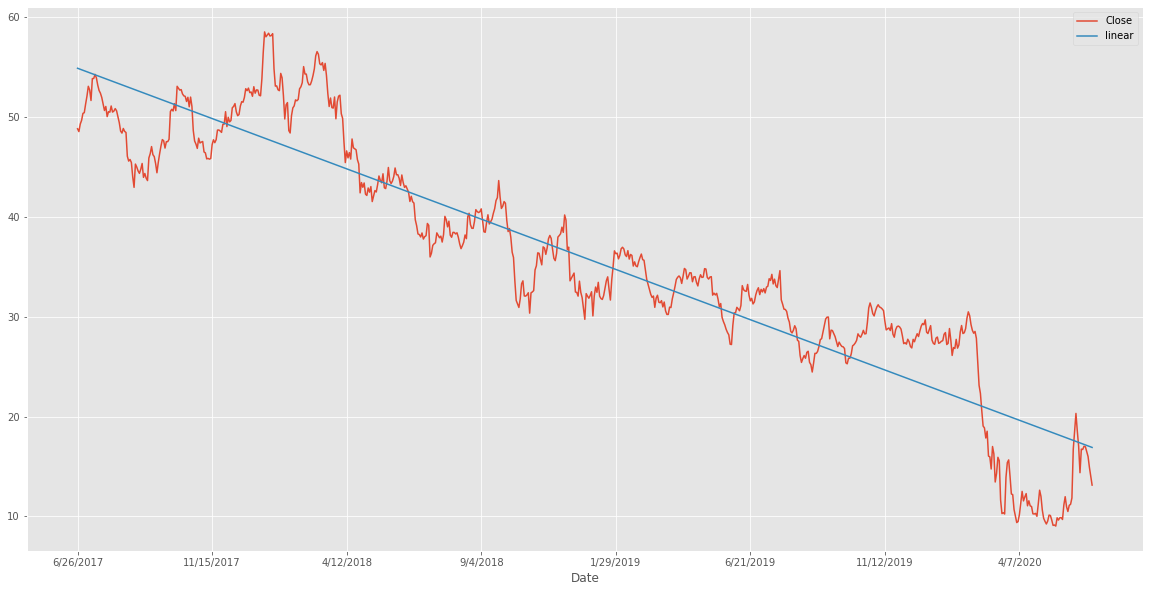

In [10]:
df['linear'] = pred
df.plot(kind="line", x="Date", y = ["Close", "linear"])

In [14]:

date = [datetime.strptime(d, '%m/%d/%Y') for d in df['Date']]

In [16]:
candlesticks = list(zip(mdates.date2num(date),df['Open'],
                   df['High'],df['Low'],df['Close'],df['Vol']))

NameError: ignored

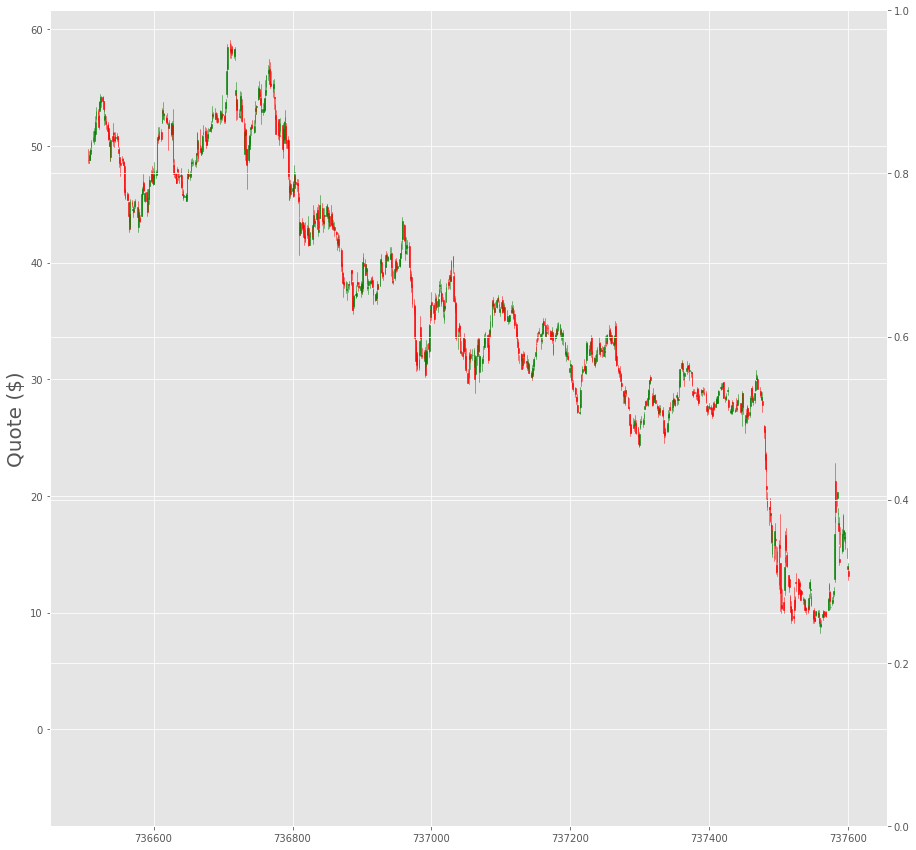

In [17]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('Quote ($)', size=20)

dates = [x[0] for x in candlesticks]
dates = np.asarray(dates)
volume = [x[5] for x in candlesticks]
volume = np.asarray(volume)

candlestick_ohlc(ax, candlesticks, width=1,
                 colorup='g', colordown='r')
pad = 0.25
yl = ax.get_ylim()
ax.set_ylim(yl[0]-(yl[1]-yl[0])*pad,yl[1])
ax2 = ax.twinx()

ax2.set_position(matplotlib.transforms.Bbox([[0.125,0],[0.9,0.32]]))

pos = df['Open'] - df['Close']<0
neg = df['Open'] - df['Close']>0
ax2.bar(dates[pos],volume[pos],color='green',width=1,align='center')
ax2.bar(dates[neg],volume[neg],color='red',width=1,align='center')

ax2.set_xlim(min(dates),max(dates))
yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::3])

ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Volume', size=20)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.show()

In [18]:
def removal(signal, repeat):
    copy_signal = np.copy(signal)
    for j in range(repeat):
        for i in range(3, len(signal)):
            copy_signal[i - 1] = (copy_signal[i - 2] + copy_signal[i]) / 2
    return copy_signal

def get(original_signal, removed_signal):
    buffer = []
    for i in range(len(removed_signal)):
        buffer.append(original_signal[i] - removed_signal[i])
    return np.array(buffer)

signal = np.copy(df.Open.values)
removed_signal = removal(signal, 30)
noise_open = get(signal, removed_signal)

signal = np.copy(df.High.values)
removed_signal = removal(signal, 30)
noise_high = get(signal, removed_signal)

signal = np.copy(df.Low.values)
removed_signal = removal(signal, 30)
noise_low = get(signal, removed_signal)

signal = np.copy(df.Close.values)
removed_signal = removal(signal, 30)
noise_close = get(signal, removed_signal)

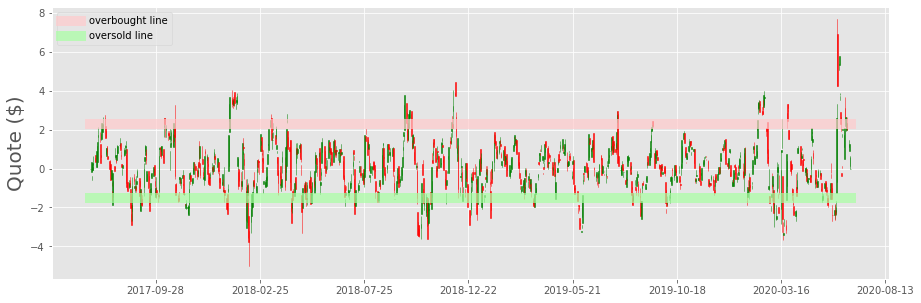

In [19]:
noise_candlesticks = list(zip(mdates.date2num(date),noise_open,
                              noise_high,noise_low,noise_close))

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('Quote ($)', size=20)

candlestick_ohlc(ax, noise_candlesticks, width=1,
                 colorup='g', colordown='r')
ax.plot(dates, [np.percentile(noise_close, 95)] * len(noise_candlesticks), color = (1.0, 0.792156862745098, 0.8, 0.7),
       linewidth=10.0, label = 'overbought line')

ax.plot(dates, [np.percentile(noise_close, 10)] * len(noise_candlesticks), 
        color = (0.6627450980392157, 1.0, 0.6392156862745098, 0.7),
       linewidth=10.0, label = 'oversold line')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.legend()
plt.show()


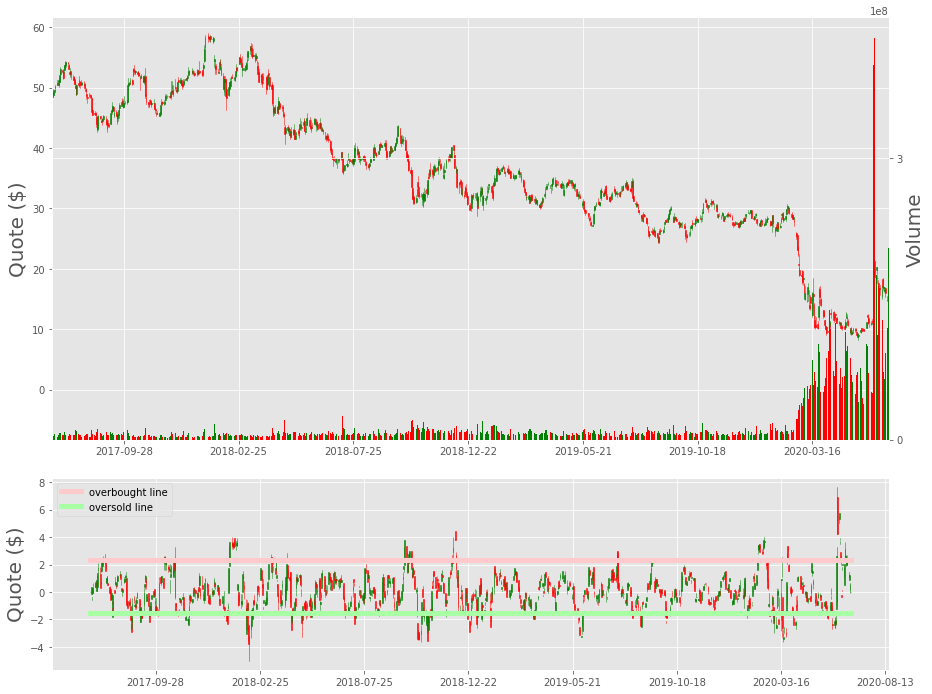

In [20]:
fig = plt.figure(figsize = (15, 12))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.set_ylabel('Quote ($)', size=20)

dates = [x[0] for x in candlesticks]
dates = np.asarray(dates)
volume = [x[5] for x in candlesticks]
volume = np.asarray(volume)

candlestick_ohlc(ax1, candlesticks, width=1,
                 colorup='g', colordown='r')
pad = 0.25
yl = ax1.get_ylim()
ax1.set_ylim(yl[0]-(yl[1]-yl[0])*pad,yl[1])
ax2 = ax1.twinx()

pos = df['Open'] - df['Close']<0
neg = df['Open'] - df['Close']>0
ax2.bar(dates[pos],volume[pos],color='green',width=1,align='center')
ax2.bar(dates[neg],volume[neg],color='red',width=1,align='center')

ax2.set_xlim(min(dates),max(dates))
yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::3])

ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Volume', size=20)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

ax2 = plt.subplot2grid((3, 1), (2, 0))

ax2.set_ylabel('Quote ($)', size=20)

candlestick_ohlc(ax2, noise_candlesticks, width=1,
                 colorup='g', colordown='r')
ax2.plot(dates, [np.percentile(noise_close, 95)] * len(noise_candlesticks), color = (1.0, 0.792156862745098, 0.8, 1.0),
       linewidth=5.0, label = 'overbought line')

ax2.plot(dates, [np.percentile(noise_close, 10)] * len(noise_candlesticks), 
        color = (0.6627450980392157, 1.0, 0.6392156862745098, 1.0),
       linewidth=5.0, label = 'oversold line')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.legend()
plt.show()